In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

# 计算欧式距离，即两点间的直线距离 
#参数：vector1-List列表，n维属性坐标值构成的向量
#      vector2-List列表，n维属性坐标值构成的向量
#返回值：浮点数，欧式距离
def euclDistance(vector1, vector2):  
    return np.sqrt(np.sum(np.power(vector2 - vector1, 2)))  

# 创建一个数据集，包含2个类别共8个样本
def createDataSet():
# 生成一个矩阵，每行表示一个样本
    group = np.array([[1.0,0.9], [1.0,1.0], [0.8,0.9], [0.6,0.65],
    [0.1, 0.2], [0.3,0.4], [0.2,0.3], [0.0, 0.1]])
# 监督学习，手工设置8个样本所属的类别标签
    labels = ['A', 'A','A', 'A', 'B', 'B','B', 'B']
    return group, labels

# KNN分类算法函数实现
#参数：newInput-List列表，待分类的数据点
#      dataSet-List列表，已分类点坐标
#      lables-List列表，分类标签
#      k-整数，近邻数量
#返回值：maxIndex-字符，分类结果
def kNNClassify(newInput, dataSet, labels, k):
    numSamples = dataSet.shape[0]   # shape[0]表示行数
    distance = []
#计算newInput与dataSet中个点的距离，放入distance列表内
    for vec in dataSet:
        distance.append(euclDistance(newInput,vec))        
#对距离排序
    sortedDistIndices = np.argsort(distance)
    classCount = {}
#选择k个最近邻
    for i in range(k):
        voteLabel = labels[sortedDistIndices[i]]
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1
    maxCount = 0
    for key, value in classCount.items():
        if value > maxCount:
            maxCount = value
            maxIndex = key
    return maxIndex

# 生成数据集和类别标签
dataSet, labels = createDataSet()
#K取值3，调用K近邻分类算法
k = 3
#对testX进行分类
testX = np.array([1.2, 1.0])
outputLabel = kNNClassify(testX, dataSet, labels, 3)
print( "Your input is:", testX, "and classified to class: ", outputLabel)
#对testY进行分类
testY = np.array([0.1, 0.3])
outputLabel = kNNClassify(testY, dataSet, labels, 3)
print("Your input is:", testY, "and classified to class: ", outputLabel)

Your input is: [1.2 1. ] and classified to class:  A
Your input is: [0.1 0.3] and classified to class:  B


In [1]:
import numpy as np
import pandas as pd

#读取excel文件，将原来二值表格转换为2维列表，用于后续处理
#参数：fname-excel文件名
#返回值：data2Dlist-2维列表
def loadExcel(fname):
    data2Dlist=[]
    pd1 = pd.read_excel(fname,'Sheet1')
    print('读入的数据文件首5行：')
    print(pd1.head())
    for index ,row in pd1.iterrows():
        list1 = row.tolist()
        list1.pop(0)
        data2Dlist.append(list1)
#显示2维列表前5项
    print('转化后的2维列表前5项：')
    print(data2Dlist[:4])
#返回该2维列表
    return data2Dlist

BMData=loadExcel('Section4 bankMarketing_info.xlsx')
BMLabel= ['工龄', '工作性质', '教育程度', '婚姻状况']
print(BMLabel)

#计算样本数据集分类标签为Y/N的概率
#参数：dataset-List列表，训练集，包含了样本数据和分类结果
#      cls_val-字符，取值为Y/N
#返回值：cnt/len(data)-浮点数，训练集中分类标签为cls_vla的频率
def Prob(dataset,cls_val):
    cnt = 0.0
    for e in dataset:
#每个样本的第4列为分类标签结果
        if e[4] == cls_val:
            cnt += 1
    return cnt/len(dataset)

#计算条件概率
#参数：dataset-List列表，训练集，包含了样本数据和分类结果
#      cls_val-字符，取值为Y/N
#      attr_index-整数，属性序号
#      attr_val-整数，属性取值
#返回值：cnt2/cnt1-浮点数，条件概率：属性取值|分类结果
def ConditionP(dataset,cls_val,attr_index,attr_val):
    cnt1 = 0.0
    cnt2 = 0.0
    for e in dataset:
#每个样本的第4列为分类标签结果
        if e[4] == cls_val:
            cnt1 += 1
            if e[attr_index] == attr_val:
                cnt2 += 1
    return cnt2/cnt1

#利用后验概率计算先验概率
#参数：dataset-List列表，训练集，包含了样本数据和分类结果
#      test-List列表，测试样本属性列表
#      cls_y,cls_n-字符，分类标签Y，N
#返回值：{cls_y:PY,cls_n:PN}-浮点数，先验概率公式1-3的分子部分
def NB(dataset,test,cls_y,cls_n):
    PY = Prob(dataset,cls_y)
    PN = Prob(dataset,cls_n)
#对于测试样本test属性取值，计算其公式1-3的分子部分
#较大的值对应较大的分类可能
    for i, val in enumerate(test):
        PY *= ConditionP(dataset,cls_y,i,val)
        PN *= ConditionP(dataset,cls_n,i,val)
    return {cls_y:round(PY,6),cls_n:round(PN,6)}

print('理财产品促销客户1预测结果:')
BMVec = [2, 2, 3, 2]
prob=NB(BMData,BMVec,'Y','N')
print(prob)

print('理财产品促销客户2预测结果:')
BMVec = [1,3,1,1]
prob=NB(BMData,BMVec,'Y','N')
print(prob)

读入的数据文件首5行：
    客户ID  工龄  岗位性质  教育程度  婚姻状态 销售结果
0  10001   1     2     1     1    N
1  10002   1     2     3     1    N
2  10003   1     3     4     1    Y
3  10004   4     2     2     1    Y
4  10005   1     1     3     2    Y
转化后的2维列表前5项：
[[1, 2, 1, 1, 'N'], [1, 2, 3, 1, 'N'], [1, 3, 4, 1, 'Y'], [4, 2, 2, 1, 'Y']]
['工龄', '工作性质', '教育程度', '婚姻状况']
理财产品促销客户1预测结果:
{'Y': 0.000943, 'N': 0.0}
理财产品促销客户2预测结果:
{'Y': 0.002475, 'N': 0.045776}


In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print('Iris数据集前5行：')
print(iris.data[0:5,:])
print('Iris数据集前5行分类：')
print(iris.target[0:5])

Iris数据集前5行：
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Iris数据集前5行分类：
[0 0 0 0 0]


In [4]:
#预处理阶段
from sklearn.preprocessing import MinMaxScaler
#区间缩放，返回值为缩放到[0, 1]区间的数据
iris_data=MinMaxScaler().fit_transform(iris.data)
print('Iris数据集归一化处理后前5行：')
print(iris_data[0:5,:])
iris_df=pd.DataFrame(iris_data,columns=['Sepal Length',
                                        'Sepal Width','Petal Length','Petal Width'])
iris_df['target']=iris.target

Iris数据集归一化处理后前5行：
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


In [5]:
#训练集与测试集分离阶段
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_df.iloc[:,0:4], 
            iris_df['target'], random_state= 14)
print('Iris训练集前5行：')
print(X_train.head(5))
print('Iris训练集分类结果：')
print(y_train.head(5).values)
print('Iris测试集前5行：')
print(X_test.head(5))
print('Iris测试集原始分类结果')
print(y_test.head(5).values)

Iris训练集前5行：
     Sepal Length  Sepal Width  Petal Length  Petal Width
119      0.472222     0.083333      0.677966     0.583333
51       0.583333     0.500000      0.593220     0.583333
125      0.805556     0.500000      0.847458     0.708333
46       0.222222     0.750000      0.101695     0.041667
15       0.388889     1.000000      0.084746     0.125000
Iris训练集分类结果：
[2 1 2 0 0]
Iris测试集前5行：
     Sepal Length  Sepal Width  Petal Length  Petal Width
24       0.138889     0.583333      0.152542     0.041667
42       0.027778     0.500000      0.050847     0.041667
6        0.083333     0.583333      0.067797     0.083333
53       0.333333     0.125000      0.508475     0.500000
113      0.388889     0.208333      0.677966     0.791667
Iris测试集原始分类结果
[0 0 0 1 2]


In [6]:
#算法实施阶段
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()    #估计器，使用KNN算法
knn.fit(X_train, y_train)
y_predicted = knn.predict(X_test)
print('Iris测试集真实结果')
print(y_test.values)
print('Iris测试集KNN算法预测结果')
print(y_predicted)

Iris测试集真实结果
[0 0 0 1 2 1 0 1 0 1 2 0 2 2 0 1 0 2 2 1 0 0 0 1 0 2 0 1 1 0 0 1 1 0 1 0 2
 1]
Iris测试集KNN算法预测结果
[0 0 0 1 2 1 0 1 0 1 1 0 2 2 0 1 0 2 2 1 0 0 0 1 0 2 0 1 1 0 0 1 1 0 1 0 2
 1]


C:\Users\Guixiang Zhu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [7]:
#性能评估阶段
accuracy = np.mean(y_predicted == y_test) *100 
print('当前分类评估器是: knn')
print('当前Accuracy是：%.1f' %accuracy + '%')

当前分类评估器是: knn
当前Accuracy是：97.4%


In [8]:
#与多种算法比较
from sklearn import tree, svm, naive_bayes,neighbors  
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, \
             RandomForestClassifier, GradientBoostingClassifier #随机森林等算法

clfs = {'svm': svm.SVC(gamma='auto'),\
        'decision_tree':tree.DecisionTreeClassifier(),
        'naive_gaussian': naive_bayes.GaussianNB(), \
        'naive_mul':naive_bayes.MultinomialNB(),\
        'K_neighbor' : neighbors.KNeighborsClassifier(),\
        'bagging_knn' : BaggingClassifier(neighbors.KNeighborsClassifier(), max_samples=0.5,max_features=0.5), \
        'bagging_tree': BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5,max_features=0.5),
        'random_forest' : RandomForestClassifier(n_estimators=50),\
        'adaboost':AdaBoostClassifier(n_estimators=50),\
        'gradient_boost' : GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,max_depth=1, random_state=0)
        }

#用样本数据训练模型，用测试数据测试训练后的算法正确率
def try_different_method(clf):
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)*100 #默认情况下分类估计器的score函数返回的是Accrracy
    print('当前Accuracy是：%.1f'%score + '%')

#依次调用clfs中的不同算法
for clf_key in clfs.keys():
    print('当前分类评估器是:',clf_key)
    clf = clfs[clf_key]
    try_different_method(clf)

当前分类评估器是: svm
当前Accuracy是：97.4%
当前分类评估器是: decision_tree
当前Accuracy是：97.4%
当前分类评估器是: naive_gaussian
当前Accuracy是：97.4%
当前分类评估器是: naive_mul
当前Accuracy是：65.8%
当前分类评估器是: K_neighbor
当前Accuracy是：97.4%
当前分类评估器是: bagging_knn
当前Accuracy是：97.4%
当前分类评估器是: bagging_tree
当前Accuracy是：100.0%
当前分类评估器是: random_forest
当前Accuracy是：97.4%
当前分类评估器是: adaboost
当前Accuracy是：97.4%
当前分类评估器是: gradient_boost


C:\Users\Guixiang Zhu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


当前Accuracy是：97.4%


In [32]:
from sklearn.metrics import confusion_matrix
y_true = [1,1,0,1,0,1]#1代表预测为恶意用户，0代表预测为正常用户 
y_pred = [1,1,1,0,0,0]#1代表预测为恶意用户，0代表预测为正常用户 
ConfusionMatrix= confusion_matrix(y_true, y_pred, labels=[0, 1])
#print(ConfusionMatrix)
#print(ConfusionMatrix.ravel())
TN, FP, FN, TP =ConfusionMatrix.ravel()
print("TN, FP, FN, TP:",TN, FP, FN, TP)
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
F_measure=2*Precision*Recall/(Precision+Recall)
print('Precision:',Precision)
print('Recall：',Recall)
print('F_measure:',F_measure)


TN, FP, FN, TP: 1 1 2 2
Precision: 0.6666666666666666
Recall： 0.5
F_measure: 0.5714285714285715


In [31]:
def calculate_TP(y_true, y_pred):
    TP = 0
    for i, j in zip(y_true, y_pred):
        if i == j == 1:
            TP += 1
    return TP

def calculate_TN(y_true, y_pred):
    TN = 0
    for i, j in zip(y_true, y_pred):
        if i == j == 0:
            TN += 1
    return TN

def calculate_FP(y_true, y_pred):
    FP = 0
    for i, j in zip(y_true, y_pred):
        if i == 0 and j == 1:
            FP += 1
    return FP

def calculate_FN(y_true, y_pred):
    FN = 0
    for i, j in zip(y_true, y_pred):
        if i == 1 and j == 0:
            FN += 1
    return FN

def calculate_Precision (y_true, y_pred):
    TP=calculate_TP(y_true, y_pred)
    FP=calculate_FP(y_true, y_pred)
    Precision=TP/(TP+FP)
    return Precision

def calculate_Recall (y_true, y_pred):
    TP=calculate_TP(y_true, y_pred)
    FN=calculate_FN(y_true, y_pred)
    Recall=TP/(TP+FN)
    return Recall

if __name__ == '__main__':
    y_true = [1,1,0,1,0,1] #1代表预测为恶意用户，0代表预测为正常用户 
    y_pred = [1,1,1,0,0,0]#1代表预测为恶意用户，0代表预测为正常用户 
    Precision=calculate_Precision(y_true,y_pred)
    print('Precision:',Precision)
    Recall=calculate_Recall(y_true,y_pred)
    print('Recall:',Recall)
    F_measure=2*Precision*Recall/(Precision+Recall)
    print('F_measure:',F_measure)

Precision: 0.6666666666666666
Recall: 0.5
F_measure: 0.5714285714285715


In [3]:
import pandas as pd
import numpy as np

#加利福利亚房价数据
caDF = pd.read_csv('Section4 california_housing.csv')
print(caDF.shape)
print('加州房价数据前5行：')
print(caDF.head())

#观察数据，发现存在缺失值和非数值型字段
sample_incompletedata = caDF[caDF.isnull().any(axis=1)]
print('存在缺失值的数据前5行：')
print(sample_incompletedata.head())

#因为total_rooms和total_bedrooms线性相关性较强，
#为了减少运算量，将total_bedrooms列舍去
caDF.drop(['total_bedrooms'],axis=1,inplace=True)

#ocean_proximity列是文本标签，描述了房屋离海滩距离
#使用LabelEncoder将文本标签转换为数值标签
from sklearn.preprocessing import LabelEncoder
caDF[['ocean_proximity']]=caDF[['ocean_proximity']].apply\
                                          (LabelEncoder().fit_transform)

#使用SkLearn的Imputer处理缺失数据
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") #用该列中位数填充缺失值
imputer.fit(caDF)
#将所有数据转换为float类型
caDF=pd.DataFrame(caDF,dtype=np.float)
print('整理后数据前5行，请注意比原始数据少了一列：')
print(caDF.head())

#分离训练集与测试集，median_house_value列的数据是研究的目标
from sklearn.model_selection import train_test_split
caDFdata=caDF.drop(['median_house_value'],axis=1)
caDFprice=caDF['median_house_value']
Train_X,Test_X,Train_y,Test_y=train_test_split(caDFdata,caDFprice,
                                              test_size=0.2,random_state=42)

#数据标准化,将每一列数据转换为均值为0，方差为1的数据，便于后续处理
from sklearn.preprocessing import StandardScaler
ss= StandardScaler().fit(Train_X)
Train_X = pd.DataFrame(ss.transform(Train_X), columns=Train_X.columns)
Test_X  = pd.DataFrame(ss.transform(Test_X),  columns=Test_X.columns)

print('标准化后训练集前5行：')
print(Train_X.head())

(20640, 10)
加州房价数据前5行：
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
存在缺失值的数据前5行：
     longitude  latitude  housing_media

<ipython-input-3-373025533e5c>:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  caDF=pd.DataFrame(caDF,dtype=np.float)


In [11]:
#随机森林回归，是集成了多棵决策树而成的森林
from sklearn import ensemble
model_rf= ensemble.RandomForestRegressor(n_estimators=20)  # 使用20个决策树
model_rf.fit(Train_X,Train_y)
rf_score=model_rf.score(Test_X,Test_y)*100
print('sklearn随机森林模型得分: %.1f' %rf_score + '%')
rf_pred=model_rf.predict(Test_X)

sklearn随机森林模型得分: 80.2%


In [12]:
#人工神经网络回归，Sklearn中，又称多层感知机MLP
from sklearn.neural_network import MLPRegressor  
model_mlp = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(5, 5),
                         random_state=1)
model_mlp.fit(Train_X,Train_y)
mlp_score=model_mlp.score(Test_X,Test_y)*100
print('sklearn人工神经网络回归模型得分: %.1f' %mlp_score + '%')

sklearn人工神经网络回归模型得分: 69.0%


C:\Users\Guixiang Zhu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [13]:
#采用GridSearchCV来进行参数调整实验，找出最佳参数组合
from sklearn.model_selection import GridSearchCV
param_grid = {'solver':['lbfgs','sgd','adam'],
              'hidden_layer_sizes': [(5,5),(10,10)]
             }
#对param_grid中的各参数进行组合，传递进MPL回归器。
#cv=3,3折交叉验证，将数据集随机分为3份，每次将一份作为测试集，其他为训练集
#n_jobs=-1，使用CPU核心数，-1表示所有可用的核
best_mlp =GridSearchCV(MLPRegressor(max_iter=200),param_grid,cv=3,n_jobs=-1)
best_mlp.fit(Train_X,Train_y)
print('当前最佳参数组合：',best_mlp.best_params_)
best_score=best_mlp.score(Test_X,Test_y)*100
print('sklearn人工神经网络上述参数得分: %.1f' %best_score + '%')
#用以上模型对Test_X进行预测
mlp_pred = best_mlp.predict(Test_X)

当前最佳参数组合： {'hidden_layer_sizes': (10, 10), 'solver': 'lbfgs'}
sklearn人工神经网络上述参数得分: 70.3%


C:\Users\Guixiang Zhu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


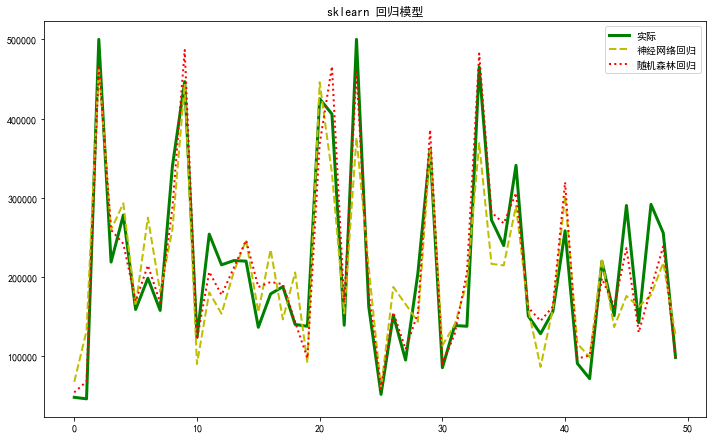

In [14]:
#绘图比较模型预测房价与真实房价的差异
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
fig = plt.figure(figsize=(10, 6))  # dpi参数指定绘图对象的分辨率，即每英寸多少个像素，缺省值为80
#axes = fig.add_subplot(1, 1, 1)
#为便于观察，只取部分结果作图
T1=Test_y[:50]
P1=mlp_pred[:50]
R1=rf_pred[:50]
plt.plot(range(len(T1)),T1, 'g',label='实际',linewidth=3)
plt.plot(range(len(P1)),P1, 'y--',label='神经网络回归',linewidth=2)
plt.plot(range(len(P1)),R1, 'r:',label='随机森林回归',linewidth=2)
fig.tight_layout()
plt.legend()
plt.title('sklearn 回归模型')
plt.savefig('skl_01.png',dpi=300,bbox_inches='tight')
plt.show()